# 1 - Introducción a pandas + numpy + matplotlib
Revisamos algunos **conceptos iniciales** de estas librerías para empezar a analizar datos. Para un tutorial inicial más completo ver [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html).

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 - Los objetos de pandas: Series
Se puede construir un objeto `Series` con cualquier serie de valores. Las `Series` pueden entenderse como listas con **funcionalides adicionales**.

In [11]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [12]:
print ("Suma:", s.sum(), "/ Cantidad de valores:", s.count())

Suma: 23.0 / Cantidad de valores: 5


Las operaciones sobre `Series` son distintas que las operaciones sobre listas.

In [13]:
s * 2

0     2.0
1     6.0
2    10.0
3     NaN
4    12.0
5    16.0
dtype: float64

In [14]:
list(s) * 2

[1.0, 3.0, 5.0, nan, 6.0, 8.0, 1.0, 3.0, 5.0, nan, 6.0, 8.0]

Las `Series` pueden tener índices, además del mero índice posicional. Por ejemplo, se puede especificar un **índice temporal**.

In [15]:
# en este caso elegimos crear una serie de tiempo
s2 = pd.Series([1,3,5,np.nan,6,8], pd.date_range("20161123", "20161128"))
s2

2016-11-23    1.0
2016-11-24    3.0
2016-11-25    5.0
2016-11-26    NaN
2016-11-27    6.0
2016-11-28    8.0
Freq: D, dtype: float64

Todos los valores de las `Series` son del mismo **tipo de dato**. Pandas interpreta los valores de la `Series` para determinar el tipo de dato que mejor se ajuste a su contenido. Se puede **forzar un tipo de datos** distinto del interpretado por `pandas`.

In [16]:
s3 = pd.Series([1,3,5,np.nan,6,8], pd.date_range("20161123", "20161128"), dtype=str)
s3

2016-11-23      1
2016-11-24      3
2016-11-25      5
2016-11-26    NaN
2016-11-27      6
2016-11-28      8
Freq: D, dtype: object

## 1.2 - Los objetos de pandas: DataFrame
Un `DataFrame` es un **conjunto de series** que tienen el mismo índice y la misma cantidad de valores. Si cada `Series` es el análogo a una lista, cada `DataFrame` es el análogo a una tabla.

In [17]:
df = pd.DataFrame({
        "serie_2": s2, 
        "serie_3": s3,
        "serie_4": [4, 3, 2, 23, 15, 30],
        "serie_5": np.array([300] * 6, dtype='int32')
    })
df

,serie_2,serie_3,serie_4,serie_5
2016-11-23,1.0,1,4,300
2016-11-24,3.0,3,3,300
2016-11-25,5.0,5,2,300
2016-11-26,NaN,NaN,23,300
2016-11-27,6.0,6,15,300
2016-11-28,8.0,8,30,300


Hay muchas formas de crear un `DataFrame`. `Pandas` tiene toda una serie de **funciones para leer distintos tipos de archivos tabulares** y cargarlos en un `DataFrame`.

In [18]:
df_personas = pd.read_csv("data/dataframe_example.csv")
df_personas

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
2,15,Carlos Hale,M
3,10,Sofía Cilar,F


Las **columnas y las filas pueden utilizarse individualmente como series**. En el caso de las columnas, si no se utilizan espacios en los encabezados, incluso se pueden llamar como cualquier otro atributo de un `DataFrame`.

In [19]:
df_personas.sexo

0    M
1    F
2    M
3    F
Name: sexo, dtype: object

In [20]:
df_personas.sexo.unique()

array(['M', 'F'], dtype=object)

Una forma útil para obtener algunas **estadísticas sumarias**de los campos numéricos es el metodo `describe`

In [21]:
df_personas.describe()

,numero
count,4.000000
mean,117.250000
std,145.493127
min,10.000000
25%,13.750000
50%,69.000000
75%,172.500000
max,321.000000


### 1.2.1 - Ordenar un DataFrame
Podemos ordenar un `DataFrame` **por los valores de sus columnas**.

In [22]:
df_personas.sort_values("nombre_apellido")

,numero,nombre_apellido,sexo
2,15,Carlos Hale,M
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
3,10,Sofía Cilar,F


In [23]:
df_personas.sort_values("numero")

,numero,nombre_apellido,sexo
3,10,Sofía Cilar,F
2,15,Carlos Hale,M
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F


Podemos ordenar un `DataFrame` **por los valores de sus índices**.

In [24]:
# ordena las filas
df_personas.sort_index(axis=0, ascending=False)

,numero,nombre_apellido,sexo
3,10,Sofía Cilar,F
2,15,Carlos Hale,M
1,321,Lucía Alvarez,F
0,123,Juan Pérez,M


In [25]:
# ordena las columnas
df_personas.sort_index(axis=1, ascending=False)

,sexo,numero,nombre_apellido
0,M,123,Juan Pérez
1,F,321,Lucía Alvarez
2,M,15,Carlos Hale
3,F,10,Sofía Cilar


### 1.2.2 - Seleccionar elementos en un DataFrame
Los objetos de tipo `DataFrame` soportan funcionalidades extendidas para los operadores **[ ]**. Estos **permiten seleccionar filas, columnas o combinaciones de éstas** dentro del `DataFrame`.

Para selccionar una columna, equivalente a `df_personas.sexo`

In [27]:
df_personas["sexo"]

0    M
1    F
2    M
3    F
Name: sexo, dtype: object

Para seleccionar **varias columnas al mismo tiempo**:

In [28]:
df_personas[["sexo", "nombre_apellido"]]

,sexo,nombre_apellido
0,M,Juan Pérez
1,F,Lucía Alvarez
2,M,Carlos Hale
3,F,Sofía Cilar


Selección por número de filas

In [29]:
df[0:2]

,serie_2,serie_3,serie_4,serie_5
2016-11-23,1.0,1,4,300
2016-11-24,3.0,3,3,300


Selección por etiqueta (índice) de fila

In [30]:
df["20161124":"20161126"]

,serie_2,serie_3,serie_4,serie_5
2016-11-24,3.0,3,3,300
2016-11-25,5.0,5,2,300
2016-11-26,NaN,NaN,23,300


Si se define una combinación de etiquetas (índices) de columna y fila, resulta equivalente a seleccionar una única celda

In [31]:
df.loc["20161124", "serie_3"]

3

Si se define una combinación de varias etiquetas, resulta en un subconjunto de valores

In [32]:
df.loc["20161124":"20161125", ["serie_3", "serie_5"]]

,serie_3,serie_5
2016-11-24,3,300
2016-11-25,5,300


Es posible **seleccionar una posición especifica** mediante su índice de fila y columna

In [33]:
df.iloc[1, 3]

300

Y al especificar rangos de valores se selecciona un subjconjunto de celdas

In [35]:
df.iloc[1:3, 2:4]

,serie_4,serie_5
2016-11-24,3,300
2016-11-25,2,300


Si el subconjunto de celdas que se desea seleccionar no es contiguo, se pueden especificar a mano sus índices

In [36]:
df.iloc[[1, 2, 5], [2, 3]]

,serie_4,serie_5
2016-11-24,3,300
2016-11-25,2,300
2016-11-28,30,300


#### Selección por expresión booleana

In [40]:
df_personas[[True, False, True, False]]

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
2,15,Carlos Hale,M


Los operadores nativos de Python usados para hacer comparaciones booleanas funcionan lugar a lugar dentro de una `Series`

In [41]:
df_personas.sexo == "M"

0     True
1    False
2     True
3    False
Name: sexo, dtype: bool

**Esto permite hacer queries facilmente.** Por ej, para seleccionar a las personas de sexo masculino dentro del `DataFrame` se usa un comparador booleano como selector

In [42]:
df_personas[df_personas.sexo == "M"]

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
2,15,Carlos Hale,M


Este tipo de comparaciones booleanas tambien pueden hacerse para un `DataFrame`

In [50]:
df > 3

,serie_2,serie_3,serie_4,serie_5
2016-11-23,False,False,True,True
2016-11-24,False,False,False,True
2016-11-25,True,True,False,True
2016-11-26,False,False,True,True
2016-11-27,True,True,True,True
2016-11-28,True,True,True,True


Este tipo de comparaciones tambien pueden hacerse para **visualizar queries dentro de un dataframe**.

In [51]:
df[df > 3] # máscara sobre todos los valores del DataFrame

,serie_2,serie_3,serie_4,serie_5
2016-11-23,NaN,NaN,4.0,300
2016-11-24,NaN,NaN,NaN,300
2016-11-25,5.0,5,NaN,300
2016-11-26,NaN,NaN,23.0,300
2016-11-27,6.0,6,15.0,300
2016-11-28,8.0,8,30.0,300


La utilización de comparadores puede ser tan compleja como se desee. **Para concatenar condiciones se utiliza `&` como `and` y `|` como `or`**.

In [52]:
df[(df > 3) & (df < 300)]

,serie_2,serie_3,serie_4,serie_5
2016-11-23,NaN,NaN,4.0,NaN
2016-11-24,NaN,NaN,NaN,NaN
2016-11-25,5.0,5,NaN,NaN
2016-11-26,NaN,NaN,23.0,NaN
2016-11-27,6.0,6,15.0,NaN
2016-11-28,8.0,8,30.0,NaN


### 1.2.3 - Setear elementos en un DataFrame
Setear una nueva serie/columna automáticamente ubica los elementos en el lugar que le corresponden según el índice de la serie y del DataFrame. Los elementos que exceden el índice del DataFrame no se incorporan.

In [53]:
s4 = pd.Series([4, 3, 2, 6, 7, 5], index=pd.date_range('20161126', periods=6))
s4

2016-11-26    4
2016-11-27    3
2016-11-28    2
2016-11-29    6
2016-11-30    7
2016-12-01    5
Freq: D, dtype: int64

In [54]:
df["serie_6"] = s4
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,4,300,NaN
2016-11-24,3.0,3,3,300,NaN
2016-11-25,5.0,5,2,300,NaN
2016-11-26,NaN,NaN,23,300,4.0
2016-11-27,6.0,6,15,300,3.0
2016-11-28,8.0,8,30,300,2.0


**Los mismos atributos que permiten seleccionar valores, permiten setear valores**.

In [55]:
df.loc[:, "serie_5"] = 500
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,4,500,NaN
2016-11-24,3.0,3,3,500,NaN
2016-11-25,5.0,5,2,500,NaN
2016-11-26,NaN,NaN,23,500,4.0
2016-11-27,6.0,6,15,500,3.0
2016-11-28,8.0,8,30,500,2.0


In [56]:
df.loc["20161126", "serie_5"] = 900
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,4,500,NaN
2016-11-24,3.0,3,3,500,NaN
2016-11-25,5.0,5,2,500,NaN
2016-11-26,NaN,NaN,23,900,4.0
2016-11-27,6.0,6,15,500,3.0
2016-11-28,8.0,8,30,500,2.0


In [57]:
df.iloc[:, 3] = "arbol"
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,4,arbol,NaN
2016-11-24,3.0,3,3,arbol,NaN
2016-11-25,5.0,5,2,arbol,NaN
2016-11-26,NaN,NaN,23,arbol,4.0
2016-11-27,6.0,6,15,arbol,3.0
2016-11-28,8.0,8,30,arbol,2.0


### 1.2.4 - Agrupar por categorías

In [58]:
df_personas

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
2,15,Carlos Hale,M
3,10,Sofía Cilar,F


In [59]:
df_personas.groupby("sexo").count()

,numero,nombre_apellido
sexo,,
F,2,2
M,2,2


In [60]:
df_personas_nan = df_personas.copy()
df_personas_nan.loc[0, "numero"] = np.nan
df_personas_nan

,numero,nombre_apellido,sexo
0,NaN,Juan Pérez,M
1,321.0,Lucía Alvarez,F
2,15.0,Carlos Hale,M
3,10.0,Sofía Cilar,F


In [61]:
df_personas_nan.groupby("sexo").count()

,numero,nombre_apellido
sexo,,
F,2,2
M,1,2


## 1.3 - Graficar o Plotear
Los objetos de `pandas` tienen un atributo `plot` que es un **wrapper sobre matplotlib, que simplifica la creación de gráficos**. `matplotlib` por default grafica en una ventana independiente a la consola que ejecuta los scripts. Para que jupyter grafique dentro de la celda de ouput existe el comando magic `%matplotlig.inline` 

In [62]:
%matplotlib inline
plt.style.use("ggplot") # para que los gráficos sean más lindos

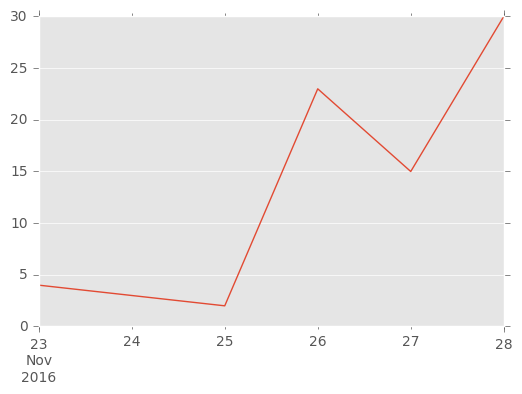

In [63]:
df.serie_4.plot.line()

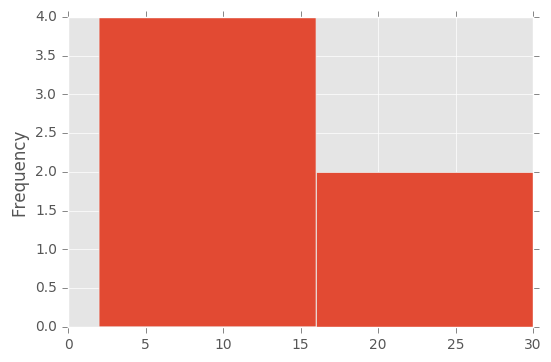

In [64]:
df.serie_4.plot.hist(bins=2)

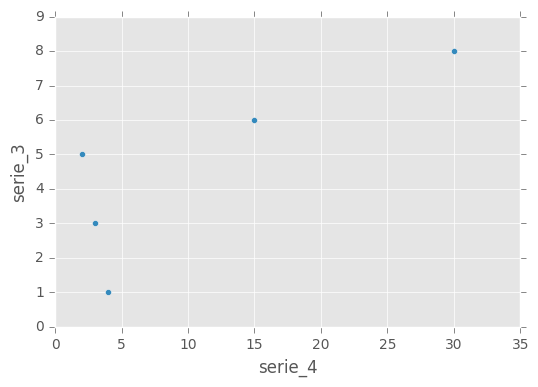

In [65]:
df.plot.scatter("serie_4", "serie_3")

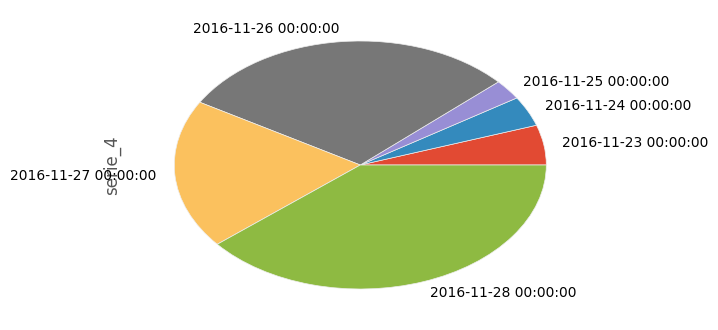

In [66]:
df.plot.pie("serie_4", legend=False)

## 1.4 - Mergear `DataFrame`s
### 1.4.1 - Mergear mediante concatenación
Vamos a extender la información de un dataframe concatenándolo con otro que tiene **nuevas filas**.

In [67]:
df_personas

,numero,nombre_apellido,sexo
0,123,Juan Pérez,M
1,321,Lucía Alvarez,F
2,15,Carlos Hale,M
3,10,Sofía Cilar,F


In [68]:
df_personas2 = pd.DataFrame({
        "numero": [400],
        "nombre_apellido": ["Ignacio Heredia"],
        "sexo": ["M"]
    })
df_personas2

,nombre_apellido,numero,sexo
0,Ignacio Heredia,400,M


In [69]:
# concatena dataframes "uno arriba del otro"
df_personas_concat = pd.concat([df_personas, df_personas2], ignore_index=True)
df_personas_concat

,nombre_apellido,numero,sexo
0,Juan Pérez,123,M
1,Lucía Alvarez,321,F
2,Carlos Hale,15,M
3,Sofía Cilar,10,F
4,Ignacio Heredia,400,M


Vamos a extender la información de un dataframe concatenándolo con otro que tiene **nuevas columnas**.

In [70]:
df_personas3 = pd.DataFrame({"profesion": ["programador"]*3 + ["artista"]*2})

# axis = 1 para concatenar dataframes "uno al lado del otro"
pd.concat([df_personas_concat, df_personas3], axis=1)

,nombre_apellido,numero,sexo,profesion
0,Juan Pérez,123,M,programador
1,Lucía Alvarez,321,F,programador
2,Carlos Hale,15,M,programador
3,Sofía Cilar,10,F,artista
4,Ignacio Heredia,400,M,artista


### 1.4.2 - Merge
Vamos a mergear un dataframe con otro que contiene el nombre de los días de la semana, utilizando el índice de tiempo que tienen los dos.

In [77]:
df

,serie_2,serie_3,serie_4,serie_5,serie_6
2016-11-23,1.0,1,4,arbol,NaN
2016-11-24,3.0,3,3,arbol,NaN
2016-11-25,5.0,5,2,arbol,NaN
2016-11-26,NaN,NaN,23,arbol,4.0
2016-11-27,6.0,6,15,arbol,3.0
2016-11-28,8.0,8,30,arbol,2.0


In [78]:
date_range = pd.date_range("20161120", periods=10)

In [79]:
df_dia_semana_ingles = pd.DataFrame({"dia_semana_ingles": date_range.weekday_name}, index=date_range)
df_dia_semana_ingles

,dia_semana_ingles
2016-11-20,Sunday
2016-11-21,Monday
2016-11-22,Tuesday
2016-11-23,Wednesday
2016-11-24,Thursday
2016-11-25,Friday
2016-11-26,Saturday
2016-11-27,Sunday
2016-11-28,Monday
2016-11-29,Tuesday


In [80]:
# "left": el dataframe principal es el de la izquierda
merged_dia_semana = pd.merge(
    df, df_dia_semana_ingles, left_index=True, right_index=True, how="left")
merged_dia_semana

,serie_2,serie_3,serie_4,serie_5,serie_6,dia_semana_ingles
2016-11-23,1.0,1,4,arbol,NaN,Wednesday
2016-11-24,3.0,3,3,arbol,NaN,Thursday
2016-11-25,5.0,5,2,arbol,NaN,Friday
2016-11-26,NaN,NaN,23,arbol,4.0,Saturday
2016-11-27,6.0,6,15,arbol,3.0,Sunday
2016-11-28,8.0,8,30,arbol,2.0,Monday


In [83]:
# "right": el dataframe principal es el de la derecha
pd.merge(df, df_dia_semana_ingles, left_index=True, right_index=True, how="right")

,serie_2,serie_3,serie_4,serie_5,serie_6,dia_semana_ingles
2016-11-20,NaN,NaN,NaN,NaN,NaN,Sunday
2016-11-21,NaN,NaN,NaN,NaN,NaN,Monday
2016-11-22,NaN,NaN,NaN,NaN,NaN,Tuesday
2016-11-23,1.0,1,4.0,arbol,NaN,Wednesday
2016-11-24,3.0,3,3.0,arbol,NaN,Thursday
2016-11-25,5.0,5,2.0,arbol,NaN,Friday
2016-11-26,NaN,NaN,23.0,arbol,4.0,Saturday
2016-11-27,6.0,6,15.0,arbol,3.0,Sunday
2016-11-28,8.0,8,30.0,arbol,2.0,Monday
2016-11-29,NaN,NaN,NaN,NaN,NaN,Tuesday


Vamos a **mergear dos dataframes utilizando una columna que tienen en común**, para traducir los días de la semana al español.

In [84]:
traduccion_dia_semana = pd.DataFrame({
    "dia_semana_ingles": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    "dia_semana_español": ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
})
traduccion_dia_semana

,dia_semana_español,dia_semana_ingles
0,Lunes,Monday
1,Martes,Tuesday
2,Miércoles,Wednesday
3,Jueves,Thursday
4,Viernes,Friday
5,Sábado,Saturday
6,Domingo,Sunday


In [85]:
pd.merge(merged_dia_semana, traduccion_dia_semana, on="dia_semana_ingles", how="left")

,serie_2,serie_3,serie_4,serie_5,serie_6,dia_semana_ingles,dia_semana_español
0,1.0,1,4,arbol,NaN,Wednesday,Miércoles
1,3.0,3,3,arbol,NaN,Thursday,Jueves
2,5.0,5,2,arbol,NaN,Friday,Viernes
3,NaN,NaN,23,arbol,4.0,Saturday,Sábado
4,6.0,6,15,arbol,3.0,Sunday,Domingo
5,8.0,8,30,arbol,2.0,Monday,Lunes
